# Data from magnetic antennas

In [23]:
import matplotlib.pyplot as plt
import glob
import os
import time
import pandas as pd 
import matplotlib.dates as mdates
import datetime

%pylab inline --no-import-all

directory = '/storage/experiments/2022/0624_bourka_CAR1'
#directory = '/storage/experiments/2022/0624_bourka_CAR0'
directory = '/storage/experiments/2022/0729_bourka_lhenice_CAR1'

#filename = '2022.06.24.20.29.34.002636'
#filename = '2022.06.24.20.32.01.821505'
#filename = '2022-06-24-20-26-48.083825-lightning'
filename = '2022.07.29.19.02.51.680018'
filename = '2022.07.29.19.26.48.037622'

video_file = directory + '/chronos/' + filename + '.mp4'
csv_file = directory + '/chronos/' + filename + '.mp4.csv'
#wfm_file = directory + '/slavia/' + filename + '.wfm'
wfm_file = directory + '/osciloskop/' + filename + '.wfm'


%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


# wfm file

In [24]:
dt = np.dtype([('a', 'u1')])
bytes_read = np.fromfile(wfm_file, dtype=dt)

In [25]:
# 200 ms / DIV
offset = 0x10
SetupSize = int.from_bytes(bytes_read[offset:offset+4], "big")
offset = 0x14 + SetupSize + 0x1C
LAdataSize = int.from_bytes(bytes_read[offset:offset+4], "big")
offset = 0x14 + SetupSize + 0x1C + 0x1D + LAdataSize + 0x1c
CHdataSize = int.from_bytes(bytes_read[offset:offset+4], "big")
offset = 0x14 + SetupSize + 0x1C + 0x1D + LAdataSize + 0x30
MemDepth = int.from_bytes(bytes_read[offset:offset+4], "big")
print(CHdataSize, MemDepth)
offset = 0x14 + SetupSize + 0x1C + 0x1D + LAdataSize + 0x39
#ch1 = list(bytes_read[offset:offset+CHdataSize:2])
#ch2 = bytes_read[offset+1:offset+CHdataSize:2]
df4 = pd.DataFrame(bytes_read[offset+3:offset+CHdataSize:4])
df3 = pd.DataFrame(bytes_read[offset+2:offset+CHdataSize:4])
df2 = pd.DataFrame(bytes_read[offset+1:offset+CHdataSize:4])
df1 = pd.DataFrame(bytes_read[offset:offset+CHdataSize:4])
df1['time']=pd.to_datetime(df1.index*2e-8, unit='s', origin='unix') # fillin of correct sample time
df1.set_index('time', inplace=True)
df2['time']=pd.to_datetime(df2.index*2e-8, unit='s', origin='unix') # fillin of correct sample time
df2.set_index('time', inplace=True)
df3['time']=pd.to_datetime(df3.index*2e-8, unit='s', origin='unix') # fillin of correct sample time
df3.set_index('time', inplace=True)
df4['time']=pd.to_datetime(df4.index*2e-8, unit='s', origin='unix') # fillin of correct sample time
df4.set_index('time', inplace=True)


500000032 125000000


In [8]:
# 100 ms / DIV
offset = 0x10
SetupSize = int.from_bytes(bytes_read[offset:offset+4], "big")
offset = 0x14 + SetupSize + 0x1C
LAdataSize = int.from_bytes(bytes_read[offset:offset+4], "big")
offset = 0x14 + SetupSize + 0x1C + 0x1D + LAdataSize + 0x1c
CHdataSize = int.from_bytes(bytes_read[offset:offset+4], "big")
offset = 0x14 + SetupSize + 0x1C + 0x1D + LAdataSize + 0x30
MemDepth = int.from_bytes(bytes_read[offset:offset+4], "big")
print(CHdataSize, MemDepth)
offset = 0x14 + SetupSize + 0x1C + 0x1D + LAdataSize + 0x39
#ch1 = list(bytes_read[offset:offset+CHdataSize:2])
#ch2 = bytes_read[offset+1:offset+CHdataSize:2]
df4 = pd.DataFrame(bytes_read[offset+3:offset+CHdataSize:4])
df3 = pd.DataFrame(bytes_read[offset+2:offset+CHdataSize:4])
df2 = pd.DataFrame(bytes_read[offset+1:offset+CHdataSize:4])
df1 = pd.DataFrame(bytes_read[offset:offset+CHdataSize:4])
df1['time']=pd.to_datetime(df1.index*1e-8, unit='s', origin='unix') # fillin of correct sample time
df1.set_index('time', inplace=True)
df2['time']=pd.to_datetime(df2.index*1e-8, unit='s', origin='unix') # fillin of correct sample time
df2.set_index('time', inplace=True)
df3['time']=pd.to_datetime(df3.index*1e-8, unit='s', origin='unix') # fillin of correct sample time
df3.set_index('time', inplace=True)
df4['time']=pd.to_datetime(df4.index*1e-8, unit='s', origin='unix') # fillin of correct sample time
df4.set_index('time', inplace=True)


500000032 125000000


In [26]:
xx1 = df1.resample('10us', closed='left').mean()
#xx1 = df1
#xx2 = df2
#xx3 = df3
#xx4 = df4
xx2 = df2.resample('1us', closed='left').mean()
xx3 = df3.resample('1us', closed='left').mean()
xx4 = df4.resample('1us', closed='left').mean()

TIMEOFFSET = -1250
#time offset
xx1.index = xx1.index + datetime.timedelta(milliseconds=TIMEOFFSET)
xx2.index = xx2.index + datetime.timedelta(milliseconds=TIMEOFFSET)
xx3.index = xx3.index + datetime.timedelta(milliseconds=TIMEOFFSET)
xx4.index = xx4.index + datetime.timedelta(milliseconds=TIMEOFFSET)

In [21]:
y = pd.read_csv(csv_file)
y['time'] = (y.index)*(1/1610)

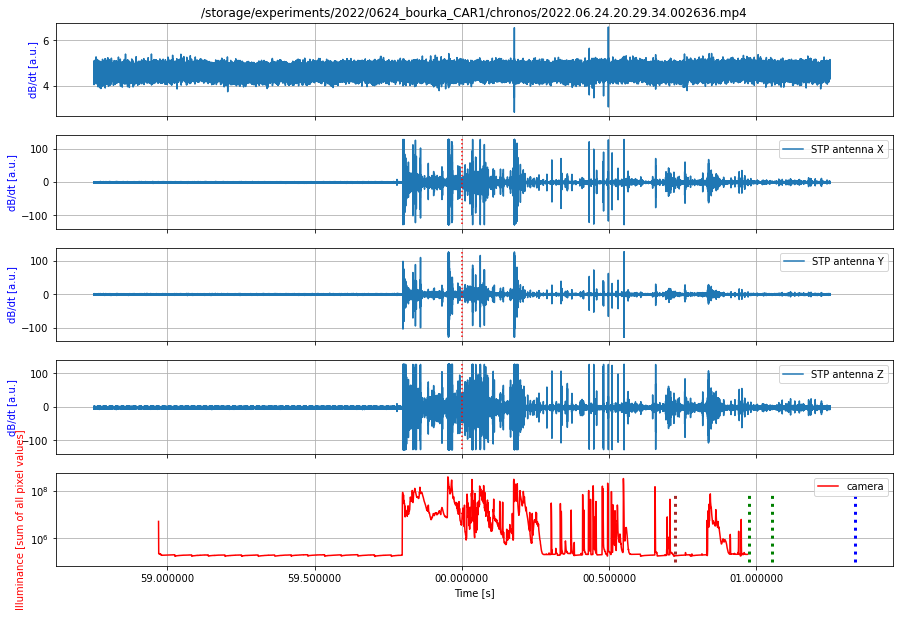

In [22]:
TIMEOFFSET = -1250 + 220
#TIMEOFFSET = -1250 + 200


fig, (ax0, ax1,  ax2, ax3, ax4) = plt.subplots(figsize=(15, 10), nrows=5, sharex=True)

ax0.plot(xx1-123, label='SLAVIA antenna')
#ax1.set_yscale('log')
#ax1.set_ylim(-5,20)
ax0.set_ylabel('dB/dt [a.u.]', c='b')
ax0.grid()
#ax0.legend(loc = "upper left")
#ax0.legend()
ax0. set_title(video_file)

ax1.plot(xx2-128, label='STP antenna X')
#ax1.set_yscale('log')
#ax1.set_ylim(-5,20)
ax1.set_ylabel('dB/dt [a.u.]', c='b')
ax1.grid()
#ax1.legend(loc = "upper left")
ax1.legend()
ax1.vlines(x=pd.to_datetime(0, unit='s', origin='unix'), ymin=-127, ymax=127, colors='r', linestyle=':')

ax2.plot(xx3-128, label='STP antenna Y')
#ax1.set_yscale('log')
#ax1.set_ylim(-5,20)
ax2.set_ylabel('dB/dt [a.u.]', c='b')
ax2.grid()
#ax1.legend(loc = "upper left")
ax2.legend()
ax2.vlines(x=pd.to_datetime(0, unit='s', origin='unix'), ymin=-127, ymax=127, colors='r', linestyle=':')

ax3.plot(xx4-128, label='STP antenna Z')
#ax1.set_yscale('log')
#ax1.set_ylim(-5,20)
ax3.set_ylabel('dB/dt [a.u.]', c='b')
ax3.grid()
#ax1.legend(loc = "upper left")
ax3.legend()
ax3.vlines(x=pd.to_datetime(0, unit='s', origin='unix'), ymin=-127, ymax=127, colors='r', linestyle=':')

#ax1.set_xlim(pd.to_datetime(0.66, unit='s'),pd.to_datetime(0.72, unit='s'))
#!!!ax1.set_xlim(pd.to_datetime(0.5, unit='s'),pd.to_datetime(2., unit='s'))
#ax1.set_xlim(pd.to_datetime(1., unit='s'),pd.to_datetime(1.19, unit='s'))

y['time'] = pd.to_datetime((y.index)*(1/1612.38), unit='s')

#ax2.plot(y['time'], y['0'], c='red', alpha=0.6, label='camera', marker='.')
ax4.plot(y['time'] + datetime.timedelta(milliseconds=TIMEOFFSET), y['0'], c='red', label='camera')
ax4.set_yscale('log')
ax4.set_xlabel('Time [s]')
ax4.set_ylabel('Illuminance [sum of all pixel values]', c='r')
ax4.grid()
ax4.legend(loc = "upper right")
ax4.xaxis.set_major_formatter(mdates.DateFormatter('%S.%f'))
ax4.vlines(x=pd.to_datetime(0.75-0.02636, unit='s', origin='unix'), ymin=1e5, ymax=1e8, colors='brown', linestyle=':', linewidth=3)
ax4.vlines(x=pd.to_datetime(1.36-0.02636, unit='s', origin='unix'), ymin=1e5, ymax=1e8, colors='b', linestyle=':', linewidth=3)
ax4.vlines(x=pd.to_datetime(1.00-0.02636, unit='s', origin='unix'), ymin=1e5, ymax=1e8, colors='g', linestyle=':', linewidth=3)
ax4.vlines(x=pd.to_datetime(1.08-0.02636, unit='s', origin='unix'), ymin=1e5, ymax=1e8, colors='g', linestyle=':', linewidth=3)
#ax4.vlines(x=pd.to_datetime(2.04 - 1.82, unit='s', origin='unix'), ymin=1e5, ymax=1e8, colors='g', linestyle=':', linewidth=3)
#plt.ylim(90,10e2)

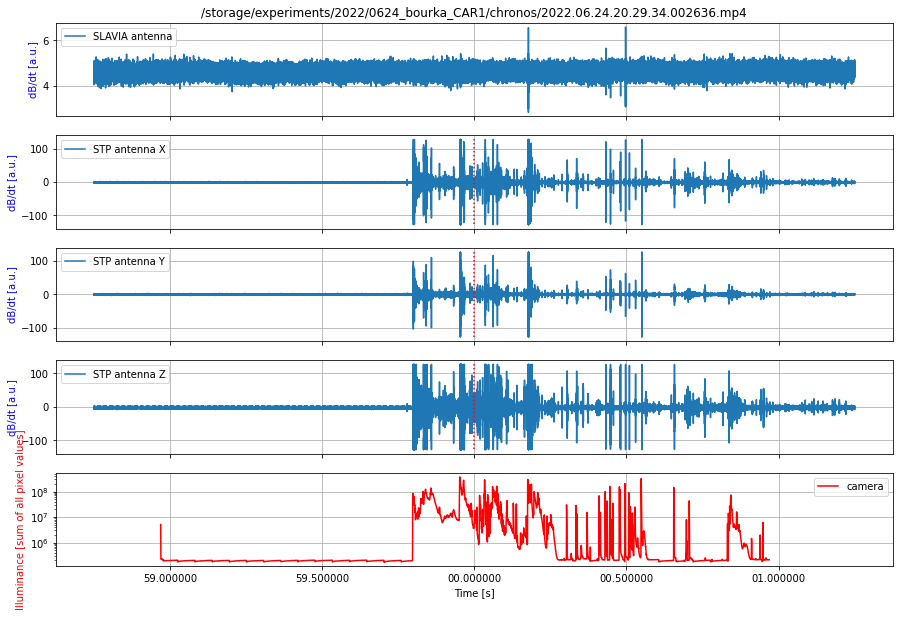

In [63]:
TIMEOFFSET = -1250 + 220
#TIMEOFFSET = -1250 + 200


fig, (ax0, ax1,  ax2, ax3, ax4) = plt.subplots(figsize=(15, 10), nrows=5, sharex=True)

ax0.plot(xx1-123, label='SLAVIA antenna')
#ax1.set_yscale('log')
#ax1.set_ylim(-5,20)
ax0.set_ylabel('dB/dt [a.u.]', c='b')
ax0.grid()
ax0.legend(loc = "upper left")
#ax0.legend()
ax0. set_title(video_file)
#ax0.set_xlim(pd.to_datetime(0.1775, unit='s', origin='unix'),pd.to_datetime(0.179, unit='s', origin='unix'))
#ax0.set_xlim(pd.to_datetime(0.17817, unit='s', origin='unix'),pd.to_datetime(0.178175, unit='s', origin='unix'))
#ax0.set_xlim(pd.to_datetime(0.4973, unit='s', origin='unix'),pd.to_datetime(0.4974, unit='s', origin='unix'))
#ax0.set_xlim(pd.to_datetime(0.4973, unit='s', origin='unix'),pd.to_datetime(0.4974, unit='s', origin='unix'))

ax1.plot(xx2-128, label='STP antenna X')
#ax1.set_yscale('log')
#ax1.set_ylim(-5,20)
ax1.set_ylabel('dB/dt [a.u.]', c='b')
ax1.grid()
ax1.legend(loc = "upper left")
#ax1.legend()
ax1.vlines(x=pd.to_datetime(0, unit='s', origin='unix'), ymin=-127, ymax=127, colors='r', linestyle=':')

ax2.plot(xx3-128, label='STP antenna Y')
#ax1.set_yscale('log')
#ax1.set_ylim(-5,20)
ax2.set_ylabel('dB/dt [a.u.]', c='b')
ax2.grid()
ax2.legend(loc = "upper left")
#ax2.legend()
ax2.vlines(x=pd.to_datetime(0, unit='s', origin='unix'), ymin=-127, ymax=127, colors='r', linestyle=':')

ax3.plot(xx4-128, label='STP antenna Z')
ax3.set_ylabel('dB/dt [a.u.]', c='b')
ax3.grid()
ax3.legend(loc = "upper left")
#ax1.set_yscale('log')
#ax1.set_ylim(-5,20)
#ax3.legend()
ax3.vlines(x=pd.to_datetime(0, unit='s', origin='unix'), ymin=-127, ymax=127, colors='r', linestyle=':')

#ax1.set_xlim(pd.to_datetime(0.66, unit='s'),pd.to_datetime(0.72, unit='s'))
#!!!ax1.set_xlim(pd.to_datetime(0.5, unit='s'),pd.to_datetime(2., unit='s'))
#ax1.set_xlim(pd.to_datetime(1., unit='s'),pd.to_datetime(1.19, unit='s'))

y['time'] = pd.to_datetime((y.index)*(1/1612.38), unit='s')

#ax2.plot(y['time'], y['0'], c='red', alpha=0.6, label='camera', marker='.')
ax4.plot(y['time'] + datetime.timedelta(milliseconds=TIMEOFFSET), y['0'], c='red', label='camera')
ax4.set_yscale('log')
ax4.set_xlabel('Time [s]')
ax4.set_ylabel('Illuminance [sum of all pixel values]', c='r')
ax4.grid()
ax4.legend(loc = "upper right")
ax4.xaxis.set_major_formatter(mdates.DateFormatter('%S.%f'))
#ax4.vlines(x=pd.to_datetime(0.75-0.02636, unit='s', origin='unix'), ymin=1e5, ymax=1e8, colors='brown', linestyle=':', linewidth=3)
#ax4.vlines(x=pd.to_datetime(1.36-0.02636, unit='s', origin='unix'), ymin=1e5, ymax=1e8, colors='b', linestyle=':', linewidth=3)
#ax4.vlines(x=pd.to_datetime(1.00-0.02636, unit='s', origin='unix'), ymin=1e5, ymax=1e8, colors='g', linestyle=':', linewidth=3)
#ax4.vlines(x=pd.to_datetime(1.08-0.02636, unit='s', origin='unix'), ymin=1e5, ymax=1e8, colors='g', linestyle=':', linewidth=3)
#ax4.vlines(x=pd.to_datetime(2.04 - 1.82, unit='s', origin='unix'), ymin=1e5, ymax=1e8, colors='g', linestyle=':', linewidth=3)
#plt.ylim(90,10e2)

In [27]:
offset = 0x10
SetupSize = int.from_bytes(bytes_read[offset:offset+4], "big")
offset = 0x14 + SetupSize + 0x1C
LAdataSize = int.from_bytes(bytes_read[offset:offset+4], "big")
offset = 0x14 + SetupSize + 0x1C + 0x1D + LAdataSize + 0x1c
CHdataSize = int.from_bytes(bytes_read[offset:offset+4], "big")
offset = 0x14 + SetupSize + 0x1C + 0x1D + LAdataSize + 0x30
MemDepth = int.from_bytes(bytes_read[offset:offset+4], "big")
print(CHdataSize, MemDepth)
offset = 0x14 + SetupSize + 0x1C + 0x1D + LAdataSize + 0x39
#ch1 = list(bytes_read[offset:offset+CHdataSize:2])
#ch2 = bytes_read[offset+1:offset+CHdataSize:2]
df4 = pd.DataFrame(bytes_read[offset+3:offset+CHdataSize:4])
df3 = pd.DataFrame(bytes_read[offset+2:offset+CHdataSize:4])
df2 = pd.DataFrame(bytes_read[offset+1:offset+CHdataSize:4])
df1 = pd.DataFrame(bytes_read[offset:offset+CHdataSize:4])
df1['time']=df1.index*2e-8
df1.set_index('time', inplace=True)
df2['time']=df2.index*2e-8
df2.set_index('time', inplace=True)
df3['time']=df3.index*2e-8
df3.set_index('time', inplace=True)
df4['time']=df4.index*2e-8
df4.set_index('time', inplace=True)

500000032 125000000


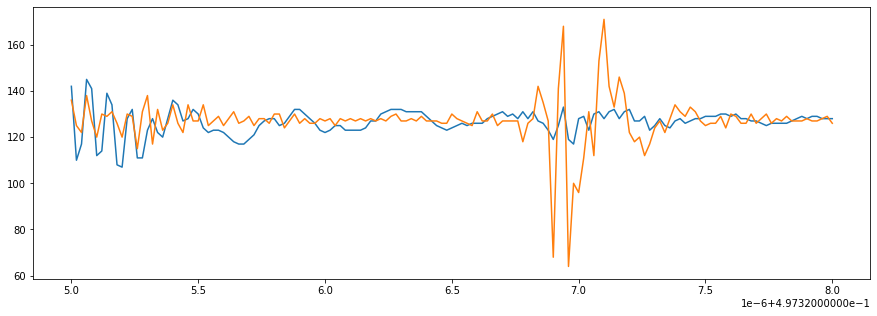

In [35]:
plt.figure(figsize=(15,5))
#plt.plot(df4[60171000:60171500])
#plt.plot(df1[60171000:60171500])
plt.plot(df4[0.497325:0.497328])
plt.plot(df1[0.497325:0.497328])


In [31]:
from scipy import signal
y1 = signal.decimate(df1['a'], 48)
y2 = signal.decimate(df2['a'], 48)
y3 = signal.decimate(df3['a'], 48)
y4 = signal.decimate(df4['a'], 48)

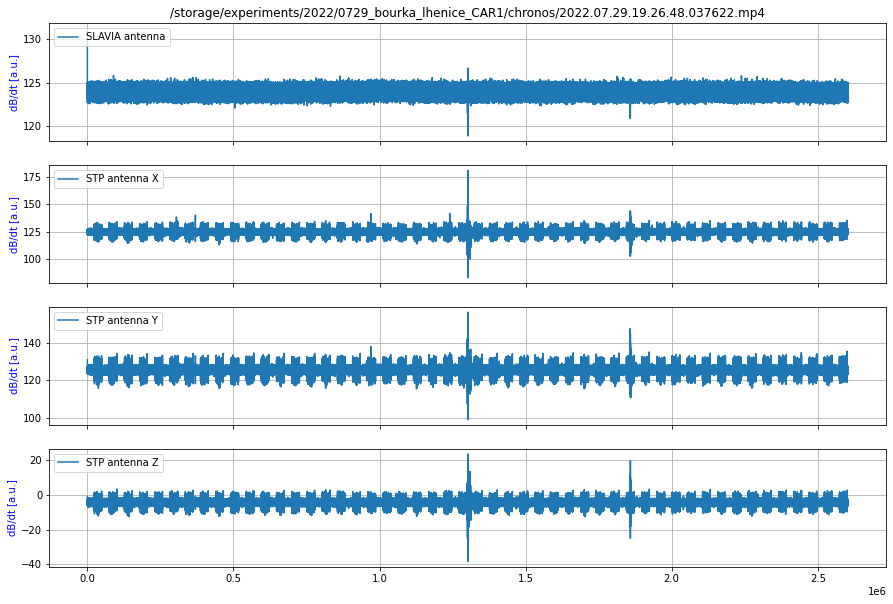

In [32]:
fig, (ax0, ax1,  ax2, ax3) = plt.subplots(figsize=(15, 10), nrows=4, sharex=True)

ax0.plot(y1, label='SLAVIA antenna')
#ax1.set_yscale('log')
#ax1.set_ylim(-5,20)
ax0.set_ylabel('dB/dt [a.u.]', c='b')
ax0.grid()
ax0.legend(loc = "upper left")
#ax0.legend()
ax0. set_title(video_file)

ax1.plot(y2, label='STP antenna X')
#ax1.set_yscale('log')
#ax1.set_ylim(-5,20)
ax1.set_ylabel('dB/dt [a.u.]', c='b')
ax1.grid()
ax1.legend(loc = "upper left")
#ax1.legend()

ax2.plot(y3, label='STP antenna Y')
#ax1.set_yscale('log')
#ax1.set_ylim(-5,20)
ax2.set_ylabel('dB/dt [a.u.]', c='b')
ax2.grid()
ax2.legend(loc = "upper left")
#ax2.legend()

ax3.plot(y4-128, label='STP antenna Z')
ax3.set_ylabel('dB/dt [a.u.]', c='b')
ax3.grid()
ax3.legend(loc = "upper left")
#ax1.set_yscale('log')
#ax1.set_ylim(-5,20)
#ax3.legend()



Text(0.5, 0, 'sample [2e-8 s]')

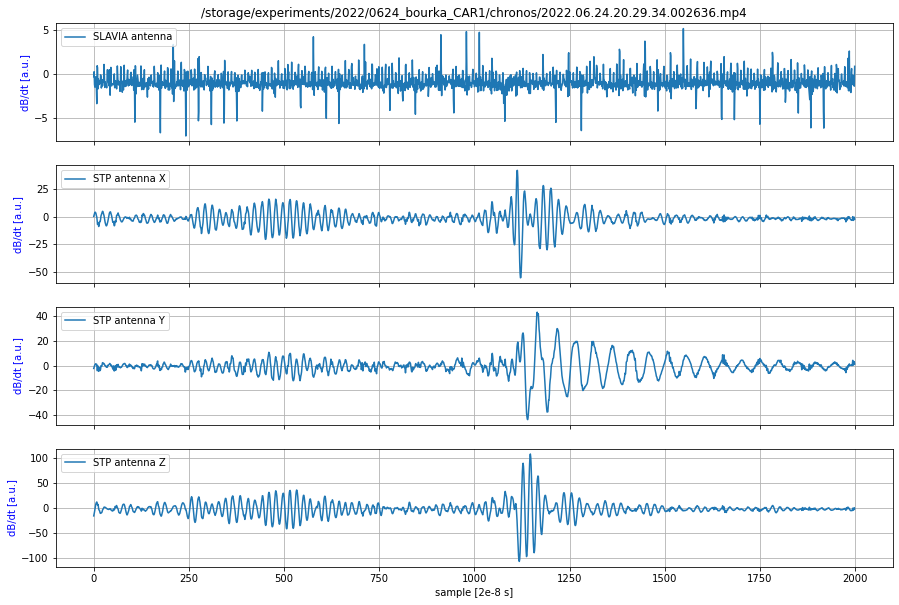

In [78]:
FROM = 8736500
TO = 8737000
FROM = 8735000
TO = 8739000
FROM = 4944000
TO = 4946000

fig, (ax0, ax1,  ax2, ax3) = plt.subplots(figsize=(15, 10), nrows=4, sharex=True)

ax0.plot(y1[FROM:TO]-127, label='SLAVIA antenna')
#ax1.set_yscale('log')
#ax1.set_ylim(-5,20)
ax0.set_ylabel('dB/dt [a.u.]', c='b')
ax0.grid()
ax0.legend(loc = "upper left")
#ax0.legend()
ax0. set_title(video_file)

ax1.plot(y2[FROM:TO]-127, label='STP antenna X')
#ax1.set_yscale('log')
#ax1.set_ylim(-5,20)
ax1.set_ylabel('dB/dt [a.u.]', c='b')
ax1.grid()
ax1.legend(loc = "upper left")
#ax1.legend()

ax2.plot(y3[FROM:TO]-127, label='STP antenna Y')
#ax1.set_yscale('log')
#ax1.set_ylim(-5,20)
ax2.set_ylabel('dB/dt [a.u.]', c='b')
ax2.grid()
ax2.legend(loc = "upper left")
#ax2.legend()

ax3.plot(y4[FROM:TO]-127, label='STP antenna Z')
ax3.set_ylabel('dB/dt [a.u.]', c='b')
ax3.grid()
ax3.legend(loc = "upper left")
#ax1.set_yscale('log')
#ax1.set_ylim(-5,20)
#ax3.legend()
ax3.set_xlabel('sample [2e-8 s]')


%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib
500000032 125000000


Text(0.5, 0, 'Time [min:sec]')

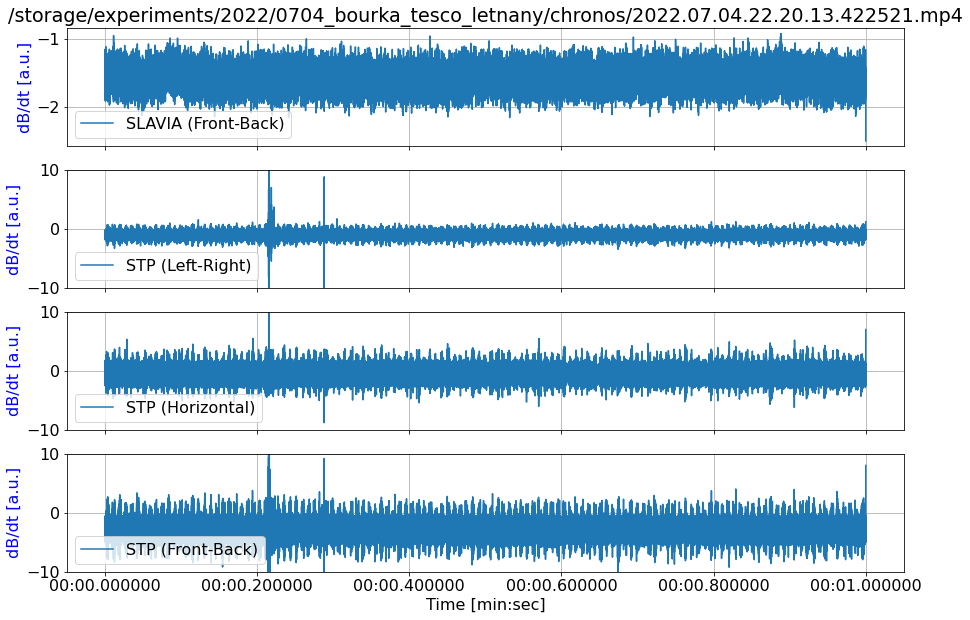

In [1]:
import matplotlib.pyplot as plt
import glob
import os
import time
import pandas as pd 
import matplotlib.dates as mdates
import datetime

%pylab inline --no-import-all

directory = '/storage/experiments/2022/0624_bourka_CAR1'
#directory = '/storage/experiments/2022/0624_bourka_CAR0'
directory = '/storage/experiments/2022/0729_bourka_lhenice_CAR1'
directory = '/storage/experiments/2022/0704_bourka_tesco_letnany'

#filename = '2022.06.24.20.29.34.002636'
#filename = '2022.06.24.20.32.01.821505'
#filename = '2022-06-24-20-26-48.083825-lightning'
filename = '2022.07.29.19.02.51.680018'
filename = '2022.07.29.19.26.48.037622' #####
#filename = '2022.07.29.20.14.50.650715' #####
#filename = '2022.07.29.22.16.22.578979' ###
filename = '2022.07.04.22.00.43.849352' # bourka TESCO Letnany
filename = '2022.07.04.22.20.13.422521' # bourka TESCO Letnany


video_file = directory + '/chronos/' + filename + '.mp4'
csv_file = directory + '/chronos/' + filename + '.mp4.csv'
#wfm_file = directory + '/slavia/' + filename + '.wfm'
wfm_file = directory + '/osciloskop/' + filename + '.wfm'


TIMEOFFSET = -1250 + 220
#TIMEOFFSET = -1250 + 200

dt = np.dtype([('a', 'u1')])
bytes_read = np.fromfile(wfm_file, dtype=dt)


# 100 ms / DIV
offset = 0x10
SetupSize = int.from_bytes(bytes_read[offset:offset+4], "big")
offset = 0x14 + SetupSize + 0x1C
LAdataSize = int.from_bytes(bytes_read[offset:offset+4], "big")
offset = 0x14 + SetupSize + 0x1C + 0x1D + LAdataSize + 0x1c
CHdataSize = int.from_bytes(bytes_read[offset:offset+4], "big")
offset = 0x14 + SetupSize + 0x1C + 0x1D + LAdataSize + 0x30
MemDepth = int.from_bytes(bytes_read[offset:offset+4], "big")
print(CHdataSize, MemDepth)
offset = 0x14 + SetupSize + 0x1C + 0x1D + LAdataSize + 0x39
#ch1 = list(bytes_read[offset:offset+CHdataSize:2])
#ch2 = bytes_read[offset+1:offset+CHdataSize:2]
df4 = pd.DataFrame(bytes_read[offset+3:offset+CHdataSize:4])
df3 = pd.DataFrame(bytes_read[offset+2:offset+CHdataSize:4])
df2 = pd.DataFrame(bytes_read[offset+1:offset+CHdataSize:4])
df1 = pd.DataFrame(bytes_read[offset:offset+CHdataSize:4])
df1['time']=pd.to_datetime(df1.index*8e-9, unit='s', origin='unix') # fillin of correct sample time
df1.set_index('time', inplace=True)
df2['time']=pd.to_datetime(df2.index*8e-9, unit='s', origin='unix') # fillin of correct sample time
df2.set_index('time', inplace=True)
df3['time']=pd.to_datetime(df3.index*8e-9, unit='s', origin='unix') # fillin of correct sample time
df3.set_index('time', inplace=True)
df4['time']=pd.to_datetime(df4.index*8e-9, unit='s', origin='unix') # fillin of correct sample time
df4.set_index('time', inplace=True)

xx1 = df1.resample('20us', closed='left').mean()
xx2 = df2.resample('5us', closed='left').mean()
xx3 = df3.resample('10us', closed='left').mean()
xx4 = df4.resample('5us', closed='left').mean()


plt.rcParams['font.size'] = '16'
fig, (ax0, ax1,  ax2, ax3) = plt.subplots(figsize=(15, 10), nrows=4, sharex=True)

ax0.plot(xx1.astype(float)-128, label='SLAVIA (Front-Back)')
#ax0.set_yscale('log')
#ax1.set_ylim(-5,20)
ax0.set_ylabel('dB/dt [a.u.]', c='b')
ax0.grid()
#ax0.legend(loc = "upper left")
ax0.legend(loc = "lower left")
#ax0.legend()
ax0. set_title(video_file)
#ax0.set_xlim(pd.to_datetime(0.1775, unit='s', origin='unix'),pd.to_datetime(0.179, unit='s', origin='unix'))
#ax0.set_xlim(pd.to_datetime(0.17817, unit='s', origin='unix'),pd.to_datetime(0.178175, unit='s', origin='unix'))
#ax0.set_xlim(pd.to_datetime(0.4973, unit='s', origin='unix'),pd.to_datetime(0.4974, unit='s', origin='unix'))
#ax0.set_xlim(pd.to_datetime(0.4973, unit='s', origin='unix'),pd.to_datetime(0.4974, unit='s', origin='unix'))

ax1.plot(xx2.astype(float)-128, label='STP (Left-Right)')
#ax1.set_yscale('log')
ax1.set_ylim(-10,10)
ax1.set_ylabel('dB/dt [a.u.]', c='b')
ax1.grid()
ax1.legend(loc = "lower left")
#ax1.legend()

'''
ax1.vlines(x=pd.to_datetime(0.5-0.0238, unit='s', origin='unix'), ymin=-10, ymax=-5, colors='brown', linestyle=':', linewidth=3)
ax1.vlines(x=pd.to_datetime(0.5-0.1274, unit='s', origin='unix'), ymin=-10, ymax=-5, colors='brown', linestyle=':', linewidth=3)
ax1.vlines(x=pd.to_datetime(0.5-0.2684, unit='s', origin='unix'), ymin=-10, ymax=-5, colors='brown', linestyle=':', linewidth=3)
ax1.vlines(x=pd.to_datetime(0.5-0.2134, unit='s', origin='unix'), ymin=-10, ymax=-5, colors='brown', linestyle=':', linewidth=3)
ax1.vlines(x=pd.to_datetime(0.5-0.1312, unit='s', origin='unix'), ymin=-10, ymax=-5, colors='brown', linestyle=':', linewidth=3)
ax1.vlines(x=pd.to_datetime(0.5-0.358, unit='s', origin='unix'), ymin=-10, ymax=-5, colors='green', linestyle=':', linewidth=3)
ax1.vlines(x=pd.to_datetime(0.5-0.383, unit='s', origin='unix'), ymin=-10, ymax=-5, colors='red', linestyle=':', linewidth=3)
ax1.vlines(x=pd.to_datetime(0.5-0.418, unit='s', origin='unix'), ymin=-10, ymax=-5, colors='brown', linestyle=':', linewidth=3)
ax1.vlines(x=pd.to_datetime(0.5-0.421, unit='s', origin='unix'), ymin=-10, ymax=-5, colors='brown', linestyle=':', linewidth=3)
ax1.vlines(x=pd.to_datetime(0.5-0.424, unit='s', origin='unix'), ymin=-10, ymax=-5, colors='brown', linestyle=':', linewidth=3)
'''

ax2.plot(xx3.astype(float)-128, label='STP (Horizontal)')
#ax2.set_yscale('log')
ax2.set_ylim(-10,10)
ax2.set_ylabel('dB/dt [a.u.]', c='b')
ax2.grid()
ax2.legend(loc = "lower left")
#ax2.legend()

ax3.plot(xx4.astype(float)-128, label='STP (Front-Back)')
ax3.set_ylabel('dB/dt [a.u.]', c='b')
ax3.set_ylim(-10,10)
ax3.grid()
ax3.legend(loc = "lower left")
#ax1.set_yscale('log')
#ax1.set_ylim(-5,20)
#ax3.legend()
ax3.set_xlabel('Time [min:sec]')



(-70.0, 70.0)

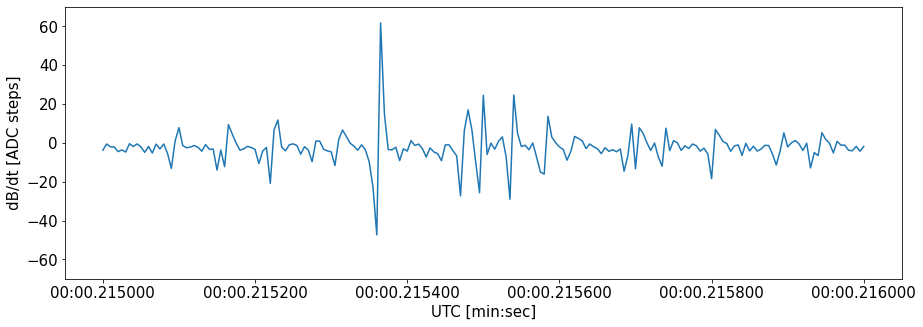

In [8]:
plt.figure(figsize=(15,5))
matplotlib.rcParams.update({'font.size': 15})

plt.plot(xx4[pd.to_datetime(0.5-0.285, unit='s', origin='unix'):pd.to_datetime(.5-0.284, unit='s', origin='unix')].astype(float) - 128 )
plt.xlabel('UTC [min:sec]')
plt.ylabel('dB/dt [ADC steps]')
plt.ylim([-70,70])


(-70.0, 70.0)

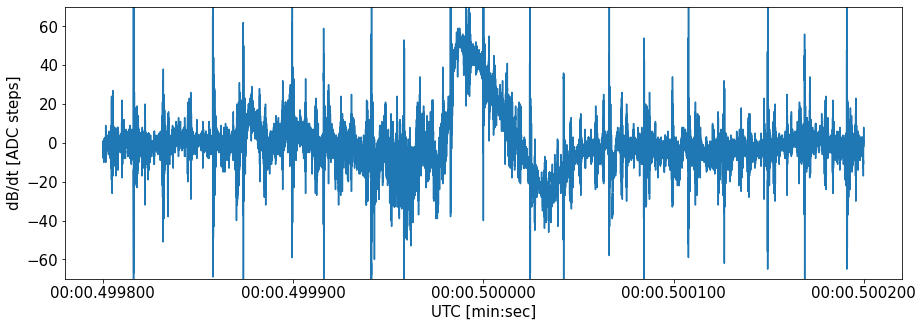

In [77]:
plt.figure(figsize=(15,5))
matplotlib.rcParams.update({'font.size': 15})

plt.plot((df2[pd.to_datetime(0.5-0.0002, unit='s', origin='unix'):pd.to_datetime(0.5+0.0002, unit='s', origin='unix')]).astype(float) - 128 )
plt.xlabel('UTC [min:sec]')
plt.ylabel('dB/dt [ADC steps]')
plt.ylim([-70,70])


Text(0.5, 0, 'Time [min:sec]')

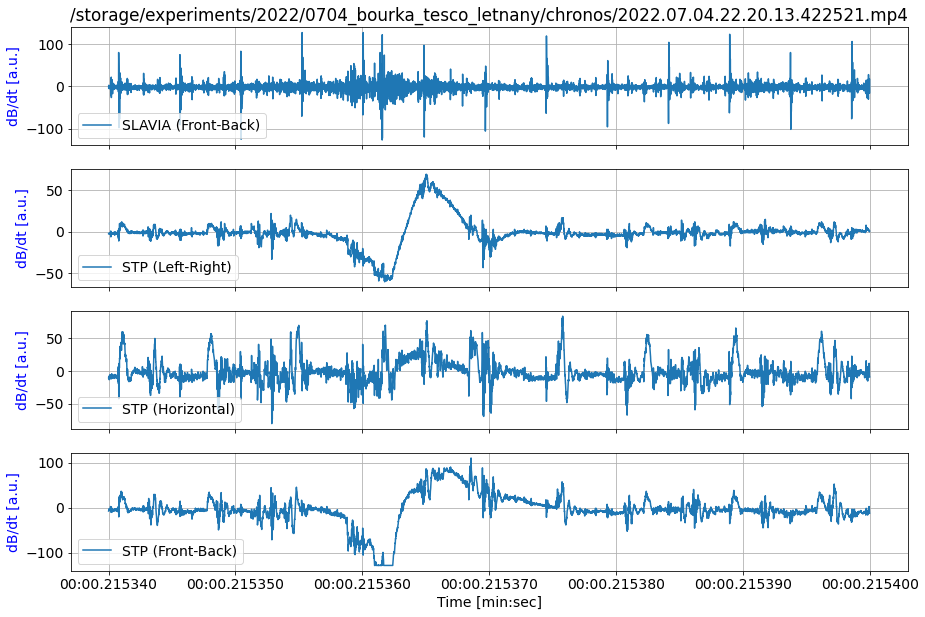

In [22]:
FROM = -0.000132
TO = -0.000125

FROM = -0.28466
TO = -0.28460


fig, (ax0, ax1,  ax2, ax3) = plt.subplots(figsize=(15, 10), nrows=4, sharex=True)
plt.rcParams['font.size'] = '14'

ax0.plot(df1[pd.to_datetime(0.5+FROM, unit='s', origin='unix'):pd.to_datetime(0.5+TO, unit='s', origin='unix')].astype(float)-128, label='SLAVIA (Front-Back)')
#ax0.set_yscale('log')
#ax1.set_ylim(-5,20)
ax0.set_ylabel('dB/dt [a.u.]', c='b')
ax0.grid()
ax0.legend(loc = "lower left")
#ax0.legend()
ax0. set_title(video_file)
#ax0.set_xlim(pd.to_datetime(0.1775, unit='s', origin='unix'),pd.to_datetime(0.179, unit='s', origin='unix'))
#ax0.set_xlim(pd.to_datetime(0.17817, unit='s', origin='unix'),pd.to_datetime(0.178175, unit='s', origin='unix'))
#ax0.set_xlim(pd.to_datetime(0.4973, unit='s', origin='unix'),pd.to_datetime(0.4974, unit='s', origin='unix'))
#ax0.set_xlim(pd.to_datetime(0.4973, unit='s', origin='unix'),pd.to_datetime(0.4974, unit='s', origin='unix'))

ax1.plot(df2[pd.to_datetime(0.5+FROM, unit='s', origin='unix'):pd.to_datetime(0.5+TO, unit='s', origin='unix')].astype(float)-128, label='STP (Left-Right)')
#ax1.set_yscale('log')
#ax1.set_ylim(-70,70)
ax1.set_ylabel('dB/dt [a.u.]', c='b')
ax1.grid()
ax1.legend(loc = "lower left")
#ax1.legend()


ax2.plot(df3[pd.to_datetime(0.5+FROM, unit='s', origin='unix'):pd.to_datetime(0.5+TO, unit='s', origin='unix')].astype(float)-128, label='STP (Horizontal)')
#ax2.set_yscale('log')
#ax2.set_ylim(-70,70)
ax2.set_ylabel('dB/dt [a.u.]', c='b')
ax2.grid()
ax2.legend(loc = "lower left")
#ax2.legend()

ax3.plot(df4[pd.to_datetime(0.5+FROM, unit='s', origin='unix'):pd.to_datetime(0.5+TO, unit='s', origin='unix')].astype(float)-128, label='STP (Front-Back)')
ax3.set_ylabel('dB/dt [a.u.]', c='b')
#ax3.set_ylim(-70,70)
ax3.grid()
ax3.legend(loc = "lower left")
#ax1.set_yscale('log')
ax3.set_xlabel('Time [min:sec]')


Text(0.5, 0, 'Time [min:sec]')

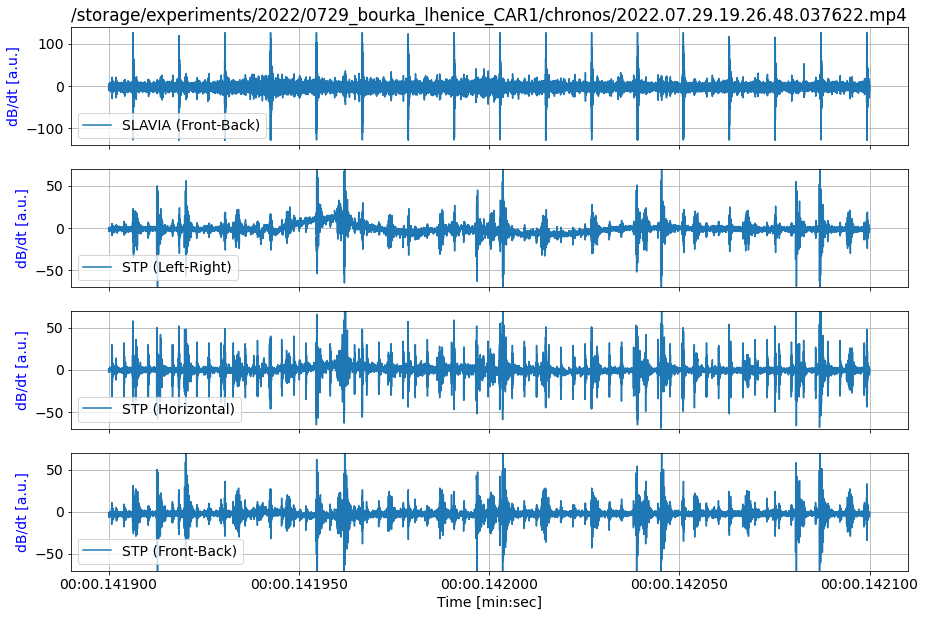

In [16]:
FROM = -0.3581
TO = -0.3579


fig, (ax0, ax1,  ax2, ax3) = plt.subplots(figsize=(15, 10), nrows=4, sharex=True)
plt.rcParams['font.size'] = '14'

ax0.plot(df1[pd.to_datetime(0.5+FROM, unit='s', origin='unix'):pd.to_datetime(0.5+TO, unit='s', origin='unix')].astype(float)-128, label='SLAVIA (Front-Back)')
#ax0.set_yscale('log')
#ax1.set_ylim(-5,20)
ax0.set_ylabel('dB/dt [a.u.]', c='b')
ax0.grid()
ax0.legend(loc = "lower left")
#ax0.legend()
ax0. set_title(video_file)
#ax0.set_xlim(pd.to_datetime(0.1775, unit='s', origin='unix'),pd.to_datetime(0.179, unit='s', origin='unix'))
#ax0.set_xlim(pd.to_datetime(0.17817, unit='s', origin='unix'),pd.to_datetime(0.178175, unit='s', origin='unix'))
#ax0.set_xlim(pd.to_datetime(0.4973, unit='s', origin='unix'),pd.to_datetime(0.4974, unit='s', origin='unix'))
#ax0.set_xlim(pd.to_datetime(0.4973, unit='s', origin='unix'),pd.to_datetime(0.4974, unit='s', origin='unix'))

ax1.plot(df2[pd.to_datetime(0.5+FROM, unit='s', origin='unix'):pd.to_datetime(0.5+TO, unit='s', origin='unix')].astype(float)-128, label='STP (Left-Right)')
#ax1.set_yscale('log')
ax1.set_ylim(-70,70)
ax1.set_ylabel('dB/dt [a.u.]', c='b')
ax1.grid()
ax1.legend(loc = "lower left")
#ax1.legend()


ax2.plot(df3[pd.to_datetime(0.5+FROM, unit='s', origin='unix'):pd.to_datetime(0.5+TO, unit='s', origin='unix')].astype(float)-128, label='STP (Horizontal)')
#ax2.set_yscale('log')
ax2.set_ylim(-70,70)
ax2.set_ylabel('dB/dt [a.u.]', c='b')
ax2.grid()
ax2.legend(loc = "lower left")
#ax2.legend()

ax3.plot(df4[pd.to_datetime(0.5+FROM, unit='s', origin='unix'):pd.to_datetime(0.5+TO, unit='s', origin='unix')].astype(float)-128, label='STP (Front-Back)')
ax3.set_ylabel('dB/dt [a.u.]', c='b')
ax3.set_ylim(-70,70)
ax3.grid()
ax3.legend(loc = "lower left")
#ax1.set_yscale('log')
ax3.set_xlabel('Time [min:sec]')
